The MIT License (MIT)
Copyright © 2021 Patrick Ledoit

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Initialise

In [2]:
import warnings
import math
warnings.filterwarnings(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas_datareader as web
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statistics as stat
s = datetime(2015, 11, 1)
mid = datetime(2018, 11, 1)
e = datetime(2021, 6, 28)

In [3]:
temp = pd.read_csv("constituents_csv.csv")
list1 = temp.Symbol
list1 = list1[:-5]
list1

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
495     GWW
496    WYNN
497     XEL
498    XLNX
499     XYL
Name: Symbol, Length: 500, dtype: object

In [4]:
def data(names):
    
    #yahoo download
    data = web.DataReader(names, 'yahoo', start=s, end=e)['Adj Close']

    return data

In [5]:
#df12 = data(list1)
#df12.to_csv("s&p500.csv")

# Filter

## Data load and check if established<=2015

In [43]:
temp = pd.read_csv("s&p500.csv")
temp = temp.dropna(axis='columns')
temp.set_index('Date',inplace = True, drop = True)
df12 = temp.loc[:mid.strftime('%Y-%m-%d'),:]
df122 = temp.loc[mid.strftime('%Y-%m-%d'):,:]
names = list(df12.columns)[1:]
df12

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,AMD,...,WRK,WY,WHR,WMB,WLTW,GWW,WYNN,XEL,XLNX,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-02,135.240585,40.871792,48.906940,76.500000,98.062218,33.256462,38.701061,89.910004,195.787003,2.190000,...,40.140354,25.222002,136.398727,27.350328,109.988556,187.797043,64.941559,30.152502,43.048321,34.182095
2015-11-03,134.251114,40.943756,48.173870,79.820000,97.797928,34.458965,36.083633,90.360001,194.145462,2.280000,...,39.487415,25.476276,136.136414,27.841064,109.042046,187.725861,66.803711,30.186138,42.912209,34.116795
2015-11-04,134.386475,40.646877,49.231026,80.279999,97.077965,35.584511,35.974922,91.010002,194.770844,2.200000,...,39.509674,25.361439,136.221054,26.907967,109.163376,187.370056,65.553276,30.303890,42.993881,34.182095
2015-11-05,134.454102,40.646877,48.436230,81.610001,96.686089,35.940453,36.016743,90.550003,195.747894,2.200000,...,38.122196,25.492674,134.249542,26.437958,109.891502,187.638443,65.652237,30.371181,42.839619,34.312656
2015-11-06,134.682419,41.051723,49.485672,81.089996,96.604057,33.670128,35.230667,90.690002,194.164993,2.150000,...,39.813881,24.934923,132.379532,26.251333,107.124771,189.794022,66.560806,29.319832,43.220737,34.433899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-26,168.686768,64.377609,69.731171,330.350006,149.143234,67.518288,42.563133,245.800003,161.641754,17.629999,...,37.680927,24.147640,95.517975,20.152815,133.863556,261.299255,95.820595,45.024788,76.204071,64.282814
2018-10-29,169.452911,64.685127,70.223152,320.029999,147.492020,63.967793,43.067005,239.750000,161.956085,16.850000,...,37.127731,24.092943,95.262131,19.912506,135.163589,262.107758,89.785912,45.860123,75.788132,63.490391
2018-10-30,173.119400,65.348213,70.421661,331.220001,149.307419,66.184410,43.973969,238.410004,162.054291,17.200001,...,38.850811,23.910633,101.676880,20.053375,135.953201,269.337006,93.046356,46.120014,79.367149,62.939564


In [44]:
df13 = pd.DataFrame()
for i in names:
    df13[i] = df12[i].pct_change()
df13.drop(list(df13.index)[0],inplace=True)

df132 = pd.DataFrame()
for i in names:
    df132[i] = df122[i].pct_change()
df132.drop(list(df132.index)[0],inplace=True)

## Variance

In [45]:
cut = 350
variances = []
df14 = df13.abs().copy()
for i in names:
    variances.append(stat.variance(list(df14.loc[:,i])))
variances = pd.Series(variances,index = names)
variances = variances.sort_values()
variances = variances.reset_index()
variances = variances.reset_index()
variances = variances.set_index('index')
variances = variances.sort_values('level_0')
variances = variances.iloc[:cut,:]
best = list(variances.index)
variances
bestv = best
# for i in best:
#     print(variances.loc[variances['Symbol'] == i])

In [46]:
vols = variances.copy()
vols[0] = (vols[0]*250).apply(np.sqrt)
vols

,level_0,0
index,,
KO,0,0.087586
PEP,1,0.092296
RSG,2,0.096670
SO,3,0.101146
XEL,4,0.101894
...,...,...
KLAC,345,0.195031
BMY,346,0.196184
PYPL,347,0.196246


## Correlation

In [47]:
corr = df13[best].corr(method='pearson')
for k in range(cut-10):
    
    corrs = pd.Series({i:corr[i].sum()/len(corr[i]) for i in best})
    max1 = corrs.idxmax()
    corr.drop(max1,axis = 0,inplace = True)
    corr.drop(max1,axis = 1,inplace = True)
    print(corr.shape,len(best))
    best.remove(max1)

corrs = pd.Series({i:corr[i].sum()/len(corr[i]) for i in best})
corrs = corrs.sort_values()
corrs

(349, 349) 350
(348, 348) 349
(347, 347) 348
(346, 346) 347
(345, 345) 346
(344, 344) 345
(343, 343) 344
(342, 342) 343
(341, 341) 342
(340, 340) 341
(339, 339) 340
(338, 338) 339
(337, 337) 338
(336, 336) 337
(335, 335) 336
(334, 334) 335
(333, 333) 334
(332, 332) 333
(331, 331) 332
(330, 330) 331
(329, 329) 330
(328, 328) 329
(327, 327) 328
(326, 326) 327
(325, 325) 326
(324, 324) 325
(323, 323) 324
(322, 322) 323
(321, 321) 322
(320, 320) 321
(319, 319) 320
(318, 318) 319
(317, 317) 318
(316, 316) 317
(315, 315) 316
(314, 314) 315
(313, 313) 314
(312, 312) 313
(311, 311) 312
(310, 310) 311
(309, 309) 310
(308, 308) 309
(307, 307) 308
(306, 306) 307
(305, 305) 306
(304, 304) 305
(303, 303) 304
(302, 302) 303
(301, 301) 302
(300, 300) 301
(299, 299) 300
(298, 298) 299
(297, 297) 298
(296, 296) 297
(295, 295) 296
(294, 294) 295
(293, 293) 294
(292, 292) 293
(291, 291) 292
(290, 290) 291
(289, 289) 290
(288, 288) 289
(287, 287) 288
(286, 286) 287
(285, 285) 286
(284, 284) 285
(283, 283)

AMCR    0.071970
SO      0.152103
CBOE    0.157690
CPB     0.174975
BMY     0.180014
DPZ     0.181883
HAL     0.184446
TGT     0.185856
RE      0.191977
UHS     0.194086
dtype: float64

In [60]:
def heatmap(data,names):
    fig, ax = plt.subplots(figsize=(20,20))     
    corr = data[names].corr(method='pearson')
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    with sns.plotting_context("notebook",font_scale=1.3): # cbar_kws = {'anchor': ''
        plot =sns.heatmap(corr,fmt = '.2f',annot=True,ax=ax,mask=mask,vmin=-1, vmax=1,cmap="mako", cbar_kws = dict(use_gridspec=False,location="left")).set_title('Key Correlations between cryptocurrencies:')
        plt.show()
        plt.clf()

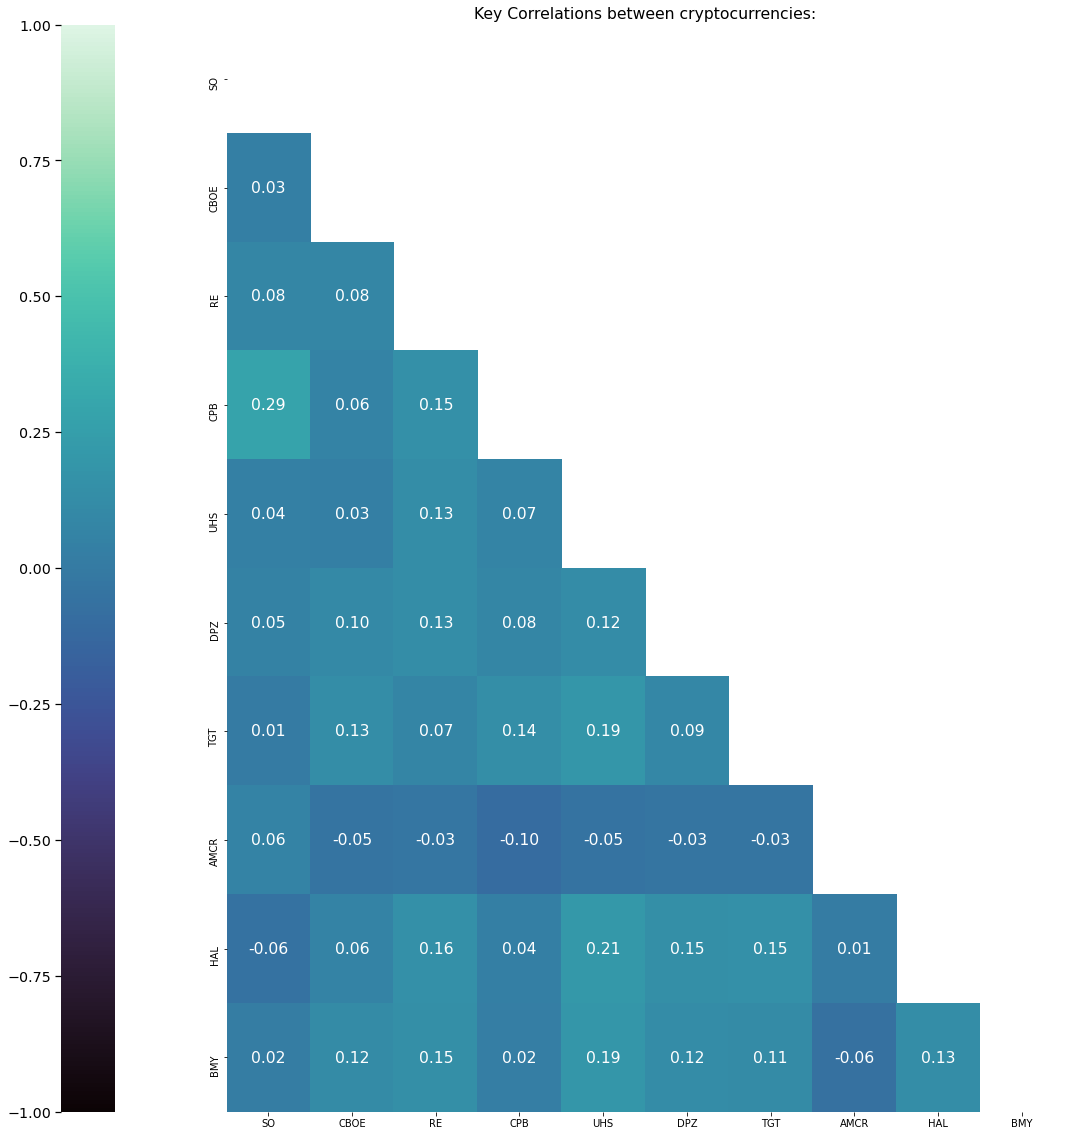

(0.1674999303189677,
 ['SO', 'CBOE', 'RE', 'CPB', 'UHS', 'DPZ', 'TGT', 'AMCR', 'HAL', 'BMY'],
 0.17084426066544292,
 SO      62275.535988
 CBOE    32254.526636
 RE      29883.391680
 CPB     19559.195476
 UHS     19144.665027
 DPZ     18151.307296
 TGT     17968.732788
 AMCR    17197.997881
 HAL     17011.277654
 BMY     16553.369573
 dtype: float64,
 {'SO': 1565,
  'CBOE': 303,
  'RE': 146,
  'CPB': 558,
  'UHS': 157,
  'DPZ': 70,
  'TGT': 228,
  'AMCR': 2151,
  'HAL': 523,
  'BMY': 344})

<Figure size 432x288 with 0 Axes>

In [61]:
heatmap(df13,best)
corr = df13[best].corr(method='pearson')
corrs = pd.Series({i:corr[i].sum()/len(corr[i]) for i in best})
corrs = corrs.sort_values()
rec = [1/i for i in variances.loc[best,0]]
weights = [(i/sum(rec))*250000 for i in rec]
weights = pd.Series(data = weights, index = best)

quantity = {}
for i in best:
    
    quantity[i] = round(weights[i]/df12.loc[list(df12.index)[-1],i])
    
sum(corrs)/len(corrs), best, sum([math.sqrt(i*250) for i in variances.loc[best,0]])/len(variances.loc[best,0]), weights, quantity

In [62]:
x = 'PG'
print(math.sqrt(stat.variance(list(df14.loc[:,x]))*250))
cols = list(df13.columns)
cols.remove(x)
corr = [df13[x].corr(df13.loc[:,i],method='pearson') for i in bestv]
sum(corr)/len(corr)
#corrs = pd.Series({i:corr[i].sum()/len(corr[i]) for i in best})

0.10615639980546393


0.1715091192769185

In [63]:
x = 'EBAY'
print(math.sqrt(stat.variance(list(df14.loc[:,x]))*250))
cols = list(df13.columns)
cols.remove(x)
corr = [df13[x].corr(df13.loc[:,i],method='pearson') for i in bestv]
sum(corr)/len(corr)
#corrs = pd.Series({i:corr[i].sum()/len(corr[i]) for i in best})

0.20536073928687135


0.11281949398799865

In [64]:
best

['SO', 'CBOE', 'RE', 'CPB', 'UHS', 'DPZ', 'TGT', 'AMCR', 'HAL', 'BMY']

## Jackknife

In [65]:
index = list(df13.index)
dfc = pd.DataFrame()
dfv = pd.DataFrame()

for i in range(df13.shape[0]):
    print(i)
    temp = df13.copy()
    temp = temp.drop(index[i])
    
    corrs = temp.corr(method = 'pearson')
    corrs2 = []
    for j in range(len(best)-1):
        for k in range(j+1,len(best)):
            corrs2.append(corrs.iloc[k,j])

    variance = [stat.variance(temp[i]) for i in best]
    dfc[i] = corrs2
    dfv[i] = variance
    
# serc = [dfc.iloc[i,:] for i in range(len(best))]
# serv = [dfv.iloc[i,:] for i in range(len(best))]

# serc,serv

print(dfc)
print(dfv)
    
    

0
1
2


KeyboardInterrupt: 

In [66]:
dfv

,0,1
0,0.000095,0.000095
1,0.000162,0.000162
2,0.000156,0.000156
3,0.000235,0.000236
4,0.000256,0.000256
5,0.000260,0.000260
6,0.000268,0.000268
7,0.000159,0.000159
8,0.000330,0.000330
9,0.000263,0.000263


In [67]:
serc = [math.sqrt(stat.variance(dfc.iloc[i,:])*250) for i in range(dfc.shape[0])]
dfv = dfv*250
dfv = dfv.apply(np.sqrt)
serv = [math.sqrt(stat.variance(dfv.iloc[i,:])*250) for i in range(dfv.shape[0])]
serc,serv

([0.014241488742133707,
  0.0051471457469998904,
  0.0038997836554639626,
  0.016383158900892217,
  0.04939362855216477,
  0.005134956565184769,
  0.001431524493573129,
  0.006572218143716603,
  0.005801034024583917,
  0.03375473436344906,
  0.018775614098323987,
  0.05262095061651067,
  0.03240868315927244,
  0.0076155966960898555,
  0.0031794804553968822,
  0.005814234178179588,
  0.02029820149798742,
  0.015031312769661622,
  0.03376153009339701,
  0.15815414413862725,
  0.006137217610960071,
  0.014835195332613746,
  0.02031358358346436,
  0.01665608112183705,
  0.007613916180754166,
  0.038245207095637446,
  0.004319505456498822,
  0.0035116902838174028,
  0.011737479111055457,
  0.00320580973509309,
  0.14482850442245676,
  0.004687477717445981,
  0.01439141260731263,
  0.04264007517467836,
  0.0006942004800128568,
  0.04955420097255424,
  0.00870524915416116,
  0.10154408593440899,
  0.013612293384967838,
  0.002115743882741038,
  0.007818118479620224,
  0.002070753630634664,
  

In [68]:
sum(serc)/len(serc),sum(serv)/len(serv)

(0.02292697163394846, 0.0005348105458385749)

In [69]:
math.sqrt(variances.loc[best[0],0]*250)-math.sqrt(variances.loc[best[5],0]*250)

-0.0862039979694223

In [70]:
dfv.head()

,0,1
0,0.154227,0.154184
1,0.201337,0.201209
2,0.197433,0.197396
3,0.242589,0.242643
4,0.253085,0.253104


In [71]:
math.sqrt(variances.loc[best[0],0]*250)-math.sqrt(variances.loc[best[1],0]*250)

-0.03939797540471712

# Check

In [72]:
bests = [['SO', 'ED', 'MCD', 'EVRG', 'DIS', 'LMT', 'PSA', 'MDT', 'PBCT', 'TJX'],
         ['SO', 'EVRG', 'EXR', 'CBOE', 'CHRW', 'RE', 'IQV', 'SLB', 'AXP', 'STZ'],
         ['SO', 'EVRG', 'CBOE', 'RE', 'HUM', 'ISRG', 'MKTX', 'GE', 'AZO', 'CPB'],
         ['SO', 'CBOE', 'RE', 'CPB', 'UHS', 'DPZ', 'TGT', 'AMCR', 'HAL', 'BMY'],
        ['ED', 'CBOE', 'MKTX', 'CPB', 'TGT', 'AMCR', 'BMY', 'HAS', 'EOG', 'EBAY']]
cuts=  [100,200,300,350,400]
#Cut 

In [73]:
#return
# df132['Date'] = list(df122.index)[1:]
# df132.set_index('Date',inplace = True, drop = True)
# temp = {i:'%'+i for i in best}
# temp = df132.loc[:,best].rename(columns = temp)


# df142 = df122.loc[list(df122.index)[1:],best].copy().join(temp,on = 'Date')
# #variance
# for i in best:
#     df142['v'+i] = df142['%'+i].rolling(7).apply(lambda x: stat.variance(x))
# df142.drop(list(df142.index)[:7],inplace = True)

# for name in names:
#     df142['check '+name] = np.nan
#     df142['w'+name] = np.nan
#     df142['b'+name] = np.nan
#     df142['n '+name] = np.nan
        
# df142['total'] = np.nan

# df142
for j in range(len(cuts)):
    cut = cuts[j]
    variances = []
    df14 = df13.abs().copy()
    for i in names:
        variances.append(stat.variance(list(df14.loc[:,i])))
    variances = pd.Series(variances,index = names)
    variances = variances.sort_values()
    variances = variances.reset_index()
    variances = variances.reset_index()
    variances = variances.set_index('index')
    variances = variances.sort_values('level_0')
    variances = variances.iloc[:cut,:]
    
    best = bests[j]
    
    rec = [1/i for i in variances.loc[best,0]]
    weights = [(i/sum(rec))*250000 for i in rec]
    weights = pd.Series(data = weights, index = best)
    
    
    quantity = {}
    for i in best:
        quantity[i] = round(weights[i]/df12.loc[list(df12.index)[-1],i])
    
    df122[f'total{j}'] = np.zeros
    for i in best:
        df122[f'total{j}'] = quantity[i]*df122[i]
    
    temp = stat.variance(df122[f'total{j}'].pct_change().abs().drop(list(df122.index)[0]))
    
    temp = math.sqrt(temp*250)
    print(temp)
  
cut = 400
variances = []
df142 = df132.abs().copy()
for i in names:
    variances.append(stat.variance(list(df142.loc[:,i])))
variances = pd.Series(variances,index = names)
variances = variances.sort_values()
variances = variances.reset_index()
variances = variances.reset_index()
variances = variances.set_index('index')
variances = variances.sort_values('level_0')
variances = variances.iloc[:cut,:]
temp = variances[0]
temp = temp.sum()/len(temp)
temp = math.sqrt(temp*250)
print(temp)

#for j in range(100,400,100):
#     sns.lineplot(x=list(df122.index), y=df122[f'total{j}'])
#     plt.show()
#     plt.clf()

0.27775769496906166
0.26687858202178244
0.21283482618618835
0.18896421570840594
0.22266638367791175
0.2698644196573608


In [74]:
avg = []
for j in range(len(cuts)):
    df122[f'%{j}'] = df122[f'total{j}'].pct_change()
    avg.append((df122[f'%{j}'].sum()/len(df122[f'%{j}']))*250)
sum(avg)/len(avg)
    
    

0.19120365471009365

In [31]:
returns = []
for i in names:
    returns.append(df122[i].pct_change().sum()/df122.shape[0])
(sum(returns)/len(names))*250

0.2518099323476951

In [32]:
df122.columns

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'AAP',
       'AMD',
       ...
       'total0', 'total1', 'total2', 'total3', 'total4', '%0', '%1', '%2',
       '%3', '%4'],
      dtype='object', length=495)

# 10K

In [75]:
temp = pd.read_csv("constituents_csv.csv")
temp

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie,Health Care
3,ABMD,Abiomed,Health Care
4,ACN,Accenture,Information Technology
...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet,Health Care
503,ZION,Zions Bancorp,Financials


# MCHP

In [76]:
df12['%TSM'] = data(['TSM'])

In [77]:
index = list(df12.index)
for i in list1:
    x = df12[i].pct_change()
    x = x.drop(index[0])
    print(i,df12.loc[index[0:],'%TSM'].corr(x,method = 'pearson'))

MMM nan
ABT nan
ABBV nan
ABMD nan
ACN nan
ATVI nan
ADM nan
ADBE nan
AAP nan
AMD nan
AES nan
AFL nan
A nan
APD nan
AKAM nan
ALK nan
ALB nan
ARE nan
ALXN nan
ALGN nan
ALLE nan
LNT nan
ALL nan
GOOGL nan
GOOG nan
MO nan
AMZN nan
AMCR nan
AEE nan
AAL nan
AEP nan
AXP nan
AIG nan
AMT nan
AWK nan
AMP nan
ABC nan
AME nan
AMGN nan
APH nan
ADI nan
ANSS nan
ANTM nan
AOS nan
AON nan
APA nan
AAPL nan
AMAT nan
APTV nan
ANET nan
AJG nan
AIZ nan
T nan
ATO nan
ADSK nan
ADP nan
AZO nan
AVB nan
AVY nan
BKR nan
BLL nan
BAC nan
BAX nan
BDX nan


KeyError: 'BRK.B'

In [78]:
newdf = pd.read_csv('s&p500.csv')
newdf = newdf.set_index('Date',drop=True)
supcomp = 'MCHP'
temp = data([supcomp])
temp = temp.drop(list(temp.index)[-1])
newdf['%'+supcomp] = list(temp[supcomp].pct_change())
newdf

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,AMD,...,WMB,WLTW,GWW,WYNN,XEL,XLNX,XYL,BRK.B,BF.B,%MCHP
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-02,135.240585,40.871792,48.906940,76.500000,98.062218,33.256462,38.701061,89.910004,195.787003,2.190000,...,27.350328,109.988556,187.797043,64.941559,30.152502,43.048321,34.182095,NaN,NaN,NaN
2015-11-03,134.251114,40.943756,48.173870,79.820000,97.797928,34.458965,36.083633,90.360001,194.145462,2.280000,...,27.841064,109.042046,187.725861,66.803711,30.186138,42.912209,34.116795,NaN,NaN,-0.001432
2015-11-04,134.386475,40.646877,49.231026,80.279999,97.077965,35.584511,35.974922,91.010002,194.770844,2.200000,...,26.907967,109.163376,187.370056,65.553276,30.303890,42.993881,34.182095,NaN,NaN,0.003482
2015-11-05,134.454102,40.646877,48.436230,81.610001,96.686089,35.940453,36.016743,90.550003,195.747894,2.200000,...,26.437958,109.891502,187.638443,65.652237,30.371181,42.839619,34.312656,NaN,NaN,-0.022045
2015-11-06,134.682419,41.051723,49.485672,81.089996,96.604057,33.670128,35.230667,90.690002,194.164993,2.150000,...,26.251333,107.124771,189.794022,66.560806,29.319832,43.220737,34.433899,NaN,NaN,-0.001252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,195.210007,111.440002,114.730003,325.089996,285.559998,91.820000,61.840000,567.349976,198.470001,82.589996,...,26.750000,230.179993,445.089996,127.610001,67.139999,127.529999,116.330002,NaN,NaN,0.014627
2021-06-22,195.139999,110.959999,114.699997,327.190002,285.660004,91.879997,61.639999,575.739990,200.039993,83.580002,...,26.730000,230.410004,442.570007,126.760002,66.750000,130.020004,116.379997,NaN,NaN,-0.012656
2021-06-23,192.360001,110.839996,114.000000,321.700012,285.700012,90.790001,61.259998,574.229980,200.710007,83.820000,...,26.730000,230.149994,444.429993,125.949997,66.230003,130.860001,116.070000,NaN,NaN,0.003976


In [79]:
corrs = []
for i in best:
    x = newdf[i].pct_change()
    x = x.drop(index[0])
    corrs.append(newdf.loc[index[1:],'%'+supcomp].corr(x,method = 'pearson'))
corrs = pd.Series(data = corrs, index = best)
corrs.sort_values(ascending = False)

EBAY    0.372927
EOG     0.251865
BMY     0.188650
MKTX    0.180334
HAS     0.166268
CBOE    0.122854
TGT     0.104133
CPB     0.052166
AMCR   -0.008952
ED     -0.028353
dtype: float64

In [80]:
sum(corrs)/len(corrs)

0.14018921613971663

In [81]:
math.sqrt(stat.variance(newdf.loc[index[1]:,'%'+supcomp])*250)

0.3794656202806012

In [82]:
newdf['%'+supcomp]

Date
2015-11-02         NaN
2015-11-03   -0.001432
2015-11-04    0.003482
2015-11-05   -0.022045
2015-11-06   -0.001252
                ...   
2021-06-21    0.014627
2021-06-22   -0.012656
2021-06-23    0.003976
2021-06-24    0.018162
2021-06-25   -0.002347
Name: %MCHP, Length: 1422, dtype: float64